In [48]:
import pandas as pd 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
data = pd.read_excel("Data_OpelCorsa (1).xlsx")

In [49]:
data.head()

,model,yil,yakit,vites,km,renk,fiyat
0,1.3 CDTI Enjoy,2004,Dizel,Manuel,270000,Kırmızı,24900
1,1.3 CDTI Enjoy,2008,Dizel,Yarı Otomatik,300000,Gri,42500
2,1.4 Enjoy,2017,Benzin,Yarı Otomatik,8780,Kırmızı,63750
3,1.3 CDTI Essentia,2004,Dizel,Manuel,200000,Mavi,25000
4,1.3 CDTI Essentia,2011,Dizel,Manuel,197000,Beyaz,29750


Text(0, 0.5, 'km')

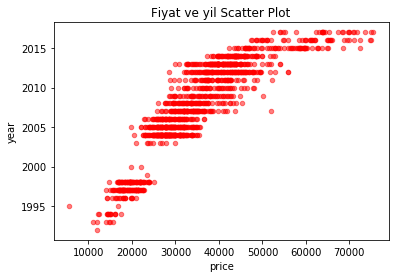

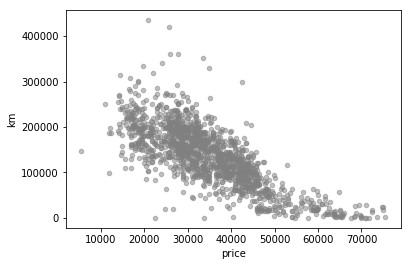

In [50]:
# Scatter Plot 
data.plot(kind='scatter', x='fiyat', y='yil',alpha = 0.5,color = 'red')
plt.xlabel('price')              # label = name of label
plt.ylabel('year')
plt.title('Fiyat ve yil Scatter Plot') 

data.plot(kind='scatter', x='fiyat', y='km',alpha = 0.5,color = 'grey')
plt.xlabel('price')              # label = name of label
plt.ylabel('km')


In [51]:
print('Original Features:\n', list(data.columns), '\n')
data= pd.get_dummies(data)
print('Features after One-Hot Encoding:\n', list(data.columns))

Original Features:
 ['model', 'yil', 'yakit', 'vites', 'km', 'renk', 'fiyat'] 

Features after One-Hot Encoding:
 ['yil', 'km', 'fiyat', 'model_1.2 Essentia', 'model_1.3 CDTI Enjoy', 'model_1.3 CDTI Essentia', 'model_1.4 Enjoy', 'model_1.4 Swing', 'yakit_Benzin', 'yakit_Benzin & LPG', 'yakit_Dizel', 'vites_Manuel', 'vites_Otomatik', 'vites_Yarı Otomatik', 'renk_Bej', 'renk_Beyaz', 'renk_Bordo', 'renk_Füme', 'renk_Gri', 'renk_Gümüş Gri', 'renk_Kahverengi', 'renk_Kırmızı', 'renk_Lacivert', 'renk_Mavi', 'renk_Mor', 'renk_Sarı', 'renk_Siyah', 'renk_Turkuaz', 'renk_Turuncu', 'renk_Yeşil', 'renk_Şampanya']


In [52]:
data.head()

,yil,km,fiyat,model_1.2 Essentia,model_1.3 CDTI Enjoy,model_1.3 CDTI Essentia,model_1.4 Enjoy,model_1.4 Swing,yakit_Benzin,yakit_Benzin & LPG,...,renk_Kırmızı,renk_Lacivert,renk_Mavi,renk_Mor,renk_Sarı,renk_Siyah,renk_Turkuaz,renk_Turuncu,renk_Yeşil,renk_Şampanya
0,2004,270000,24900,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2008,300000,42500,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,8780,63750,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,2004,200000,25000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,197000,29750,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Importing the dataset
X = data.iloc[:, data.columns != 'fiyat']
y = data.fiyat

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [56]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
    model.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# Fitting to the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=10, verbose=False)
estimator.fit(X_train, y_train)
# Predicting the results
prediction = estimator.predict(X_test)

In [64]:
(y_test-prediction)

9       2612.263672
342      778.117188
676     -782.898438
1287   -4738.269531
893    -2642.625000
1389    2095.195312
54        77.400391
870    -3633.402344
1448    4542.046875
994    -7822.332031
776    -2822.250000
1425    2823.871094
1010   -2095.117188
1270    1250.082031
1247    2350.542969
1423   -2508.054688
442     -149.861328
152     1881.144531
963     -131.115234
440      203.771484
634     2225.675781
1471     940.312500
901    -2241.664062
958    -1231.082031
381     1782.750000
678     1389.494141
1024     336.281250
682     2802.839844
1073   -2341.929688
930    -4477.453125
           ...     
317    -3343.542969
1372    4853.984375
846    -5769.296875
760     -514.574219
662    -1289.511719
527     -934.814453
1108     795.416016
1290    3618.191406
610    -4144.769531
1038    6114.070312
47      -471.025391
1078     954.892578
1409    1340.445312
1018    4377.035156
438      871.710938
361    -6580.253906
916    -1081.859375
295     2775.968750
302      989.976562
